# Merging KLD and FUNDA
<div class="alert alert-block alert-warning">
<b>Warning:</b> KLD does not provide CUSIP before 1994.
</div>


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read datasets.

In [2]:
kld = pd.read_csv('kld.csv')
kld.shape

(53168, 201)

In [3]:
comp = pd.read_csv('funda.csv')

In [4]:
comp.shape

(223876, 25)

In [5]:
comp.columns

Index(['gvkey', 'tic', 'cusip', 'conm', 'datadate', 'fyear', 'sich', 'at',
       'aqc', 'ppegt', 'ppent', 'emp', 'capx', 'capxv', 'sale', 'cogs', 'xad',
       'xrd', 'xsga', 'pstkl', 'txditc', 'pstkrv', 'seq', 'pstk', 'mkvalt'],
      dtype='object')

In [6]:
kld.shape

(53168, 201)

In [7]:
kld.columns

Index(['companyname', 'cusip', 'ticker', 'companyid', 'env_str_a', 'env_str_b',
       'env_str_c', 'env_str_d', 'env_str_f', 'env_str_x',
       ...
       'G Avg Index', 'Controv', 'Controv_avg', 'Controv Index',
       'Controv Avg Index', 'ESG_pos', 'ESG_neg', 'ESG Pos-Neg Index',
       'ESG Agg Index', 'ESG Agg Avg Index'],
      dtype='object', length=201)

Some tickers in KLD dataset are in lowercase. Need to convert them back to uppercase.

In [8]:
kld['ticker'] = kld['ticker'].str.upper()
comp['tic'] = comp['tic'].str.upper()

Collect the sets of tickers and look at the intersection from different datasets.

In [9]:
kld_tic = (set(kld.ticker.dropna().sort_values().str.upper()))

In [10]:
comp_tic = (set(comp.tic.dropna().sort_values().str.upper()))

In [11]:
len(kld_tic.intersection(comp_tic))

4473

In [12]:
"LSI.1" in comp_tic

True

Collect the sets of CUSIP and look at the intersection from different datasets.

In [13]:
kld_cusip = (set(kld.cusip.dropna()))
comp_cusip = (set(comp.cusip.dropna()))

In [14]:
len(kld_cusip.intersection(comp_cusip))

0

# Merge

In [15]:
data = comp.merge(kld, left_on = ['tic', 'fyear'], right_on=['ticker', 'year'])

In [16]:
data.shape

(36168, 226)

In [17]:
data[data['ticker'] =='LSI'][['companyname', 'conm', 'tic', 'ticker', 'cusip_x', 'cusip_y', 'fyear', 'year']]

,companyname,conm,tic,ticker,cusip_x,cusip_y,fyear,year
22828,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,1996.0,1996.0
22829,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,1997.0,1997.0
22830,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,1998.0,1998.0
22831,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,1999.0,1999.0
22832,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,2000.0,2000.0
22833,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,2001.0,2001.0
22834,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,2002.0,2002.0
22835,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,2003.0,2003.0
22836,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,2004.0,2004.0
22837,LSI Logic Corporation,LIFE STORAGE INC,LSI,LSI,53223X107,50216110,2005.0,2005.0


In [28]:
comp['cusip8']=comp['cusip'].str[0:8]
comp['cusip6']=comp['cusip'].str[0:6]
kld['cusip6']=kld['cusip'].str[0:6]

In [29]:
data2= comp.merge(kld, left_on = ['cusip8', 'fyear'], right_on=['cusip', 'year'])

In [30]:
data2.shape

(33057, 229)

In [31]:
data3=comp.merge(kld, left_on = ['cusip6', 'fyear'], right_on=['cusip6', 'year'])
data3.shape

(35727, 228)

In [32]:
sum(data3['year']<=1994)

0

In [242]:
data2[data2['ticker'] =='LSI'][['companyname', 'conm', 'tic', 'ticker', 'cusip_x', 'cusip_y', 'fyear', 'year']]

,companyname,conm,tic,ticker,cusip_x,cusip_y,fyear,year
5573,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,1996.0,1996.0
5574,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,1997.0,1997.0
5575,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,1998.0,1998.0
5576,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,1999.0,1999.0
5577,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,2000.0,2000.0
5578,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,2001.0,2001.0
5579,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,2002.0,2002.0
5580,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,2003.0,2003.0
5581,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,2004.0,2004.0
5582,LSI Logic Corporation,LSI CORP,LSI.1,LSI,502161102,50216110,2005.0,2005.0


In [245]:
comp[comp['tic'] == 'LSI'][['conm', 'tic', 'cusip', 'fyear']]

,conm,tic,cusip,fyear
143250,LIFE STORAGE INC,LSI,53223X107,1995.0
143320,LIFE STORAGE INC,LSI,53223X107,1994.0
143321,LIFE STORAGE INC,LSI,53223X107,1996.0
143322,LIFE STORAGE INC,LSI,53223X107,1997.0
143323,LIFE STORAGE INC,LSI,53223X107,1998.0
143324,LIFE STORAGE INC,LSI,53223X107,1999.0
143325,LIFE STORAGE INC,LSI,53223X107,2000.0
143326,LIFE STORAGE INC,LSI,53223X107,2001.0
143327,LIFE STORAGE INC,LSI,53223X107,2002.0
143329,LIFE STORAGE INC,LSI,53223X107,2003.0


In [252]:
comp[comp['tic'] == 'LSI.1'][['conm', 'tic', 'cusip', 'fyear']]

,conm,tic,cusip,fyear
30066,LSI CORP,LSI.1,502161102,1990.0
30067,LSI CORP,LSI.1,502161102,1991.0
30068,LSI CORP,LSI.1,502161102,1992.0
30069,LSI CORP,LSI.1,502161102,1993.0
30070,LSI CORP,LSI.1,502161102,1994.0
30071,LSI CORP,LSI.1,502161102,1995.0
30072,LSI CORP,LSI.1,502161102,1996.0
30073,LSI CORP,LSI.1,502161102,1997.0
30074,LSI CORP,LSI.1,502161102,1998.0
30075,LSI CORP,LSI.1,502161102,1999.0


In [345]:
kld[kld['ticker'] == 'AMZN'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
4430,"Amazon.com, Inc.",AMZN,02313510,2001.0
4431,"Amazon.com, Inc.",AMZN,23135106,2012.0
4432,"Amazon.com, Inc.",AMZN,02313510,2002.0
4433,"Amazon.com, Inc.",AMZN,02313510,2003.0
4434,"Amazon.com, Inc.",AMZN,02313510,2004.0
4435,"Amazon.com, Inc.",AMZN,23135106,2005.0
4436,"Amazon.com, Inc.",AMZN,23135106,2006.0
4437,"Amazon.com, Inc.",AMZN,23135106,2007.0
4438,"Amazon.com, Inc.",AMZN,23135106,2008.0
4439,"Amazon.com, Inc.",AMZN,23135106,2009.0


In [346]:
kld[kld['ticker'] == 'AAPL'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
1632,"Apple Computer, Inc.",AAPL,NaN,1991.0
1633,"Apple Computer, Inc.",AAPL,NaN,1992.0
1634,"Apple Computer, Inc.",AAPL,NaN,1993.0
1635,"Apple Computer, Inc.",AAPL,NaN,1994.0
1636,"Apple Computer, Inc.",AAPL,03783310,1995.0
1637,"Apple Computer, Inc.",AAPL,03783310,1996.0
1638,"Apple Computer, Inc.",AAPL,03783310,1997.0
1640,"Apple Computer, Inc.",AAPL,03783310,1998.0
1641,"Apple Computer, Inc.",AAPL,03783310,1999.0
1642,"Apple Computer, Inc.",AAPL,37833100,2000.0


In [353]:
kld[kld['ticker'] == 'F'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
18441,Ford Motor Company,F,NaN,1991.0
18442,Ford Motor Company,F,NaN,1992.0
18444,Ford Motor Company,F,NaN,1993.0
18445,Ford Motor Company,F,NaN,1994.0
18446,Ford Motor Company,F,34537010,1995.0
18447,Ford Motor Company,F,34537010,1996.0
18448,Ford Motor Company,F,34537010,1997.0
18449,Ford Motor Company,F,34537010,1998.0
18450,Ford Motor Company,F,34537010,1999.0
18451,Ford Motor Company,F,34537086,2000.0


In [355]:
comp[comp['tic'] == 'F'][['conm', 'tic', 'cusip', 'fyear']]

,conm,tic,cusip,fyear
20950,FORD MOTOR CO,F,345370860,1990.0
20951,FORD MOTOR CO,F,345370860,1991.0
20952,FORD MOTOR CO,F,345370860,1992.0
20953,FORD MOTOR CO,F,345370860,1993.0
20954,FORD MOTOR CO,F,345370860,1994.0
20955,FORD MOTOR CO,F,345370860,1995.0
20956,FORD MOTOR CO,F,345370860,1996.0
20957,FORD MOTOR CO,F,345370860,1997.0
20958,FORD MOTOR CO,F,345370860,1998.0
20959,FORD MOTOR CO,F,345370860,1999.0


In [250]:
kld[kld['cusip'] == '53223X10'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
29564,"LIFE STORAGE, INC.",LSI,53223X10,2016.0


In [255]:
kld[kld['cusip'] == '50216110'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
29546,LSI Logic Corporation,LSI,50216110,1996.0
29547,LSI Logic Corporation,LSI,50216110,1997.0
29548,LSI Logic Corporation,LSI,50216110,1998.0
29549,LSI Logic Corporation,LSI,50216110,1999.0
29550,LSI Logic Corporation,LSI,50216110,2000.0
29551,LSI Logic Corporation,LSI,50216110,2001.0
29552,LSI Logic Corporation,LSI,50216110,2002.0
29553,LSI Logic Corporation,LSI,50216110,2003.0
29554,LSI Logic Corporation,LSI,50216110,2004.0
29555,LSI Logic Corporation,LSI,50216110,2005.0


In [256]:
kld[kld['companyname'] == 'LSI Logic Corporation'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
29546,LSI Logic Corporation,LSI,50216110,1996.0
29547,LSI Logic Corporation,LSI,50216110,1997.0
29548,LSI Logic Corporation,LSI,50216110,1998.0
29549,LSI Logic Corporation,LSI,50216110,1999.0
29550,LSI Logic Corporation,LSI,50216110,2000.0
29551,LSI Logic Corporation,LSI,50216110,2001.0
29552,LSI Logic Corporation,LSI,50216110,2002.0
29553,LSI Logic Corporation,LSI,50216110,2003.0
29554,LSI Logic Corporation,LSI,50216110,2004.0
29555,LSI Logic Corporation,LSI,50216110,2005.0


In [276]:
kld[kld['companyname'] == 'LIFE STORAGE, INC.'][['companyname', 'ticker', 'cusip', 'year']]

,companyname,ticker,cusip,year
29564,"LIFE STORAGE, INC.",LSI,53223X10,2016.0


In [303]:
kld[kld['year'] <= 1994][['companyname', 'ticker', 'cusip', 'year']].sample(20)

,companyname,ticker,cusip,year
13584,Central and South West Corporation,CSR,15235710,1994.0
51375,Whitman Corporation,WH,96647K10,1994.0
6086,"Avon Products, Inc.",AVP,05430310,1993.0
31337,"McGraw-Hill, Inc.",MHP,58064510,1992.0
48437,Textron Inc.,TXT,88320310,1991.0
50824,Wang Laboratories Inc.,WANB,NaN,1992.0
33688,"New England Business Service, Inc.",NEBS,NaN,1994.0
1941,American Barrick Resources Corporation,ABX,NaN,1994.0
36445,Phillips Petroleum Company,P,71850710,1994.0
21224,"Giddings & Lewis, Inc.",GIDL,37504810,1994.0


In [297]:
kld

,companyname,cusip,ticker,companyid,env_str_a,env_str_b,env_str_c,env_str_d,env_str_f,env_str_x,...,G Avg Index,Controv,Controv_avg,Controv Index,Controv Avg Index,ESG_pos,ESG_neg,ESG Pos-Neg Index,ESG Agg Index,ESG Agg Avg Index
0,"AuthenTec, Inc.",52660107,NaN,15927.0,0.0,0.0,NaN,0.0,NaN,0.0,...,-0.250000,0.0,0.0,-0.0,-0.0,0.0,3.0,-3.0,-3.0,-0.403846
1,Benihana Inc,82047200,NaN,10211.0,NaN,0.0,0.0,0.0,NaN,0.0,...,-0.250000,0.0,0.0,-0.0,-0.0,0.0,3.0,-3.0,-3.0,-0.403846
2,"MEDTOX Scientific, Inc.",58497720,NaN,16012.0,NaN,0.0,NaN,0.0,NaN,0.0,...,-0.250000,0.0,0.0,-0.0,-0.0,0.0,3.0,-3.0,-3.0,-0.403846
3,AKER SOLUTIONS ASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,-0.0,-0.0,1.0,0.0,1.0,1.0,NaN
4,Capital Property Fund Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53163,Sealy Corporation,81213930,ZZ,13186.0,0.0,0.0,NaN,0.0,NaN,1.0,...,0.000000,0.0,0.0,-0.0,-0.0,1.0,2.0,-1.0,-1.0,0.033333
53164,Sealy Corporation,81213930,ZZ,13186.0,0.0,0.0,NaN,0.0,NaN,1.0,...,-0.333333,0.0,0.0,-0.0,-0.0,1.0,3.0,-2.0,-2.0,-0.300000
53165,Hubbell Incorporated,NaN,huba,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.000000
53166,"NWNL Companies, Inc.",NaN,nwn,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,-0.0,-0.0,2.0,0.0,2.0,2.0,0.095238


In [364]:
cols = ['cusip']
kld[cols] = kld.groupby(['companyname','ticker'])[cols].bfill() # can try only using companyname

In [354]:
data2[data2['tic']=='F'][['cusip_x', 'cusip_y', 'year']]

,cusip_x,cusip_y,year
4213,345370860,34537086,2000.0
4214,345370860,34537086,2001.0
4215,345370860,34537086,2002.0
4216,345370860,34537086,2003.0
4217,345370860,34537086,2004.0
4218,345370860,34537086,2005.0
4219,345370860,34537086,2006.0
4220,345370860,34537086,2007.0
4221,345370860,34537086,2008.0
4222,345370860,34537086,2009.0


In [18]:
#!pip install fuzzywuzzy

from fuzzywuzzy import fuzz

/Users/shinggg/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [21]:
# Calculate name matching ratio using FuzzyWuzzy

# Note: fuzz ratio = 100 -> match perfectly
#       fuzz ratio = 0   -> do not match at all

# Comment: token_set_ratio is more flexible in matching the strings:
# fuzz.token_set_ratio('AMAZON.COM INC',  'AMAZON COM INC')
# returns value of 100

# fuzz.ratio('AMAZON.COM INC',  'AMAZON COM INC')
# returns value of 93

data['name_ratio'] = data.apply(lambda x: fuzz.token_set_ratio(x.conm, x.companyname), axis=1)

# assign size portfolio
data = data[['tic', 'ticker', 'conm','companyname','name_ratio']]

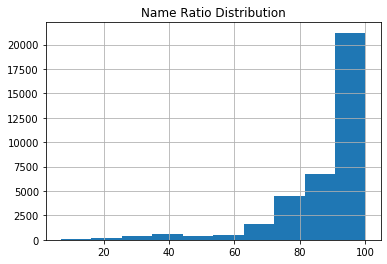

In [27]:
plt.hist(data.name_ratio.dropna())
plt.title('Name Ratio Distribution')
plt.grid()
plt.show()

In [33]:
# Calculate name matching ratio using FuzzyWuzzy

# Note: fuzz ratio = 100 -> match perfectly
#       fuzz ratio = 0   -> do not match at all

# Comment: token_set_ratio is more flexible in matching the strings:
# fuzz.token_set_ratio('AMAZON.COM INC',  'AMAZON COM INC')
# returns value of 100

# fuzz.ratio('AMAZON.COM INC',  'AMAZON COM INC')
# returns value of 93

data3['name_ratio'] = data3.apply(lambda x: fuzz.token_set_ratio(x.conm, x.companyname), axis=1)

# assign size portfolio
data3 = data3[['tic', 'ticker', 'conm','companyname','name_ratio']]

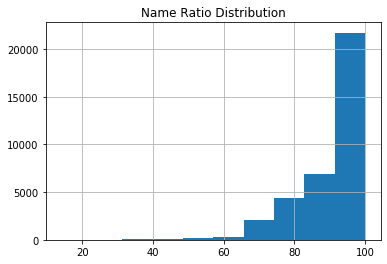

In [34]:
plt.hist(data3.name_ratio.dropna())
plt.title('Name Ratio Distribution')
plt.grid()
plt.show()

In [39]:
data3[data3['name_ratio']<30]

,tic,ticker,conm,companyname,name_ratio
4905,HPQ,HPQ,HP INC,Hewlett-Packard Company,21
7722,ES,NU,EVERSOURCE ENERGY,NORTHEAST UTILITIES,17
7723,ES,NU,EVERSOURCE ENERGY,NORTHEAST UTILITIES,17
10038,CAA,SPF,CALATLANTIC GROUP INC,STANDARD PACIFIC CORP.,29
10934,USG,USG,USG CORP,United States Gypsum Company,28
10935,USG,USG,USG CORP,United States Gypsum Company,28
10936,USG,USG,USG CORP,United States Gypsum Company,28
10937,USG,USG,USG CORP,United States Gypsum Company,28
10938,USG,USG,USG CORP,United States Gypsum Company,28
11498,WGL,WGL,WGL HOLDINGS INC,Washington Gas Light Company,23
